In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [415]:
#Load
csv_path = "C:\\Users\\sssns\\Desktop\\New\\10.09.2025\\E_sim\\Case Study\\Case Study\\"
df = pd.read_csv(csv_path+"my_dataset.csv")


In [416]:
df.isnull().sum()

UserID          0
Day             0
Sessions        0
Duration        0
Transactions    0
Spent           0
Revenue         0
OS              0
Country         0
dtype: int64

In [417]:
df.head(5)

,UserID,Day,Sessions,Duration,Transactions,Spent,Revenue,OS,Country
0,99610,05.03.2024,2,83,1,1.386057,6.928618,iOS,France
1,99610,07.03.2024,3,97,1,0.000000,9.576498,iOS,France
2,99610,09.03.2024,1,50,0,0.000000,0.000000,iOS,France
3,99610,11.03.2024,4,153,0,0.000000,0.000000,iOS,France
4,99610,13.03.2024,2,54,0,0.000000,0.000000,iOS,France


In [418]:
df['Spent'].sort_values(ascending=True).unique()

array([0.        , 0.32752609, 0.32924626, 0.38454577, 0.51488161,
       0.55470253, 0.57352317, 0.6314594 , 0.72455732, 0.79357986,
       0.85161409, 1.06206083, 1.1906093 , 1.21059194, 1.38605739,
       1.41180264, 1.5291888 , 1.55033229, 1.59323287, 1.68561801,
       1.86439145, 1.98269511, 2.0919905 , 2.12903457, 2.25557024,
       2.26794653, 2.35163713, 2.40007274, 2.43633335, 2.54760134,
       2.56213387, 2.62191587, 2.68223008, 2.70884579, 2.71890922,
       2.76043493, 2.83007304, 2.86174866, 3.00427967, 3.21085299,
       3.23716691, 3.43501546, 3.50941918, 3.55694317, 3.57452691,
       3.67572042, 3.67925049, 3.90433862, 3.97448421, 3.99997604,
       4.11065203, 4.19773252, 4.26792894, 4.3127562 , 4.39150811,
       4.74644941, 4.86355376, 4.94524847, 4.98740299, 5.28187527,
       5.41834951, 5.42483137, 5.47794215, 5.49600398, 5.50574862,
       5.52533279, 5.54472365, 5.84881871, 5.99000096, 5.99254315,
       6.16073951, 6.2090367 , 6.45222747, 6.82820679, 7.05734

In [419]:
df['Day'].fillna('1753-01-01', inplace=True)


C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\3821059640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day'].fillna('1753-01-01', inplace=True)


In [420]:
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')


In [421]:
df['Month'] = df['Day'].dt.month
df['Year'] = df['Day'].dt.year
df['Weekday'] = df['Day'].dt.day_name()
df['YearMonth'] = df['Day'].dt.year.round(0).astype(str) + '-' + df['Day'].dt.month.round(0).astype(str).str.zfill(2)

In [422]:
df_clearned = df[df['Day'] != pd.Timestamp('1753-01-01')]   


Total number of users: 96

Number of users with recorded date: 96

Dynamics:


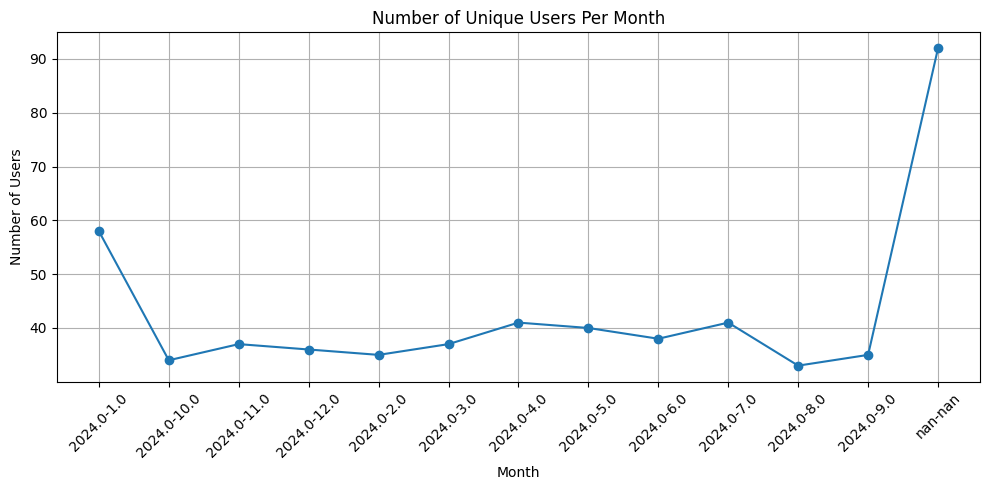

In [423]:
#1	Total number of users and dynamics
total_users = df['UserID'].nunique()
total_users_clearned = df_clearned['UserID'].nunique()
print(f'\nTotal number of users: {total_users}')
print(f'\nNumber of users with recorded date: {total_users_clearned}')

print('\nDynamics:')
users_per_month = df_clearned.groupby('YearMonth')['UserID'].nunique()
plt.figure(figsize=(10, 5))
plt.plot(users_per_month.index, users_per_month.values, marker='o')
plt.title('Number of Unique Users Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



Total number of sessions: 2241

Number of sessions with recorded date: 2241

Dynamics:


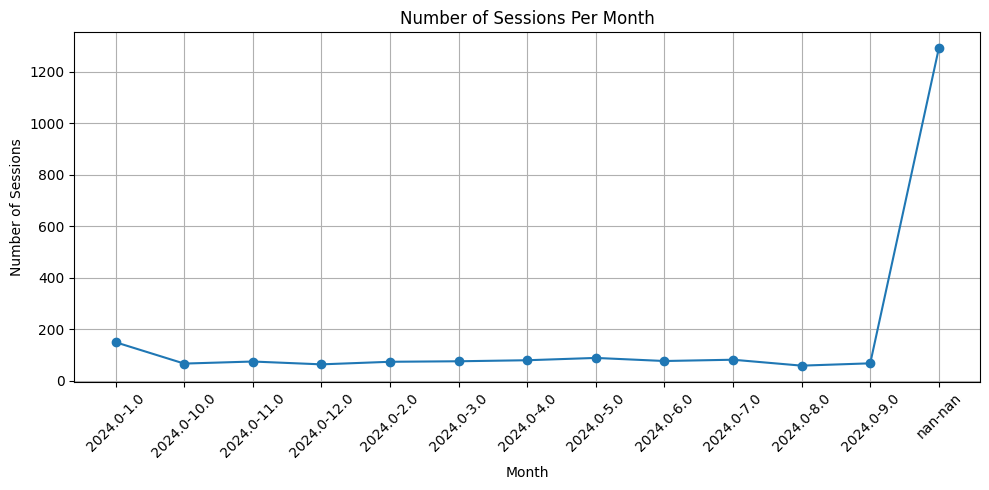

In [424]:
#2	Total number of sessions and dynamics 
total_sessions = df['Sessions'].sum()
total_sessions_clearned = df_clearned['Sessions'].sum()
print(f'\nTotal number of sessions: {total_sessions}')
print(f'\nNumber of sessions with recorded date: {total_sessions_clearned}')

print('\nDynamics:')
sessions_per_month = df_clearned.groupby('YearMonth')['Sessions'].sum()
plt.figure(figsize=(10, 5))
plt.plot(sessions_per_month.index, sessions_per_month.values, marker='o')
plt.title('Number of Sessions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total summ of revenue: 1166.0772512258045

Summ of revenue with recorded date: 1166.0772512258045

Dynamics:


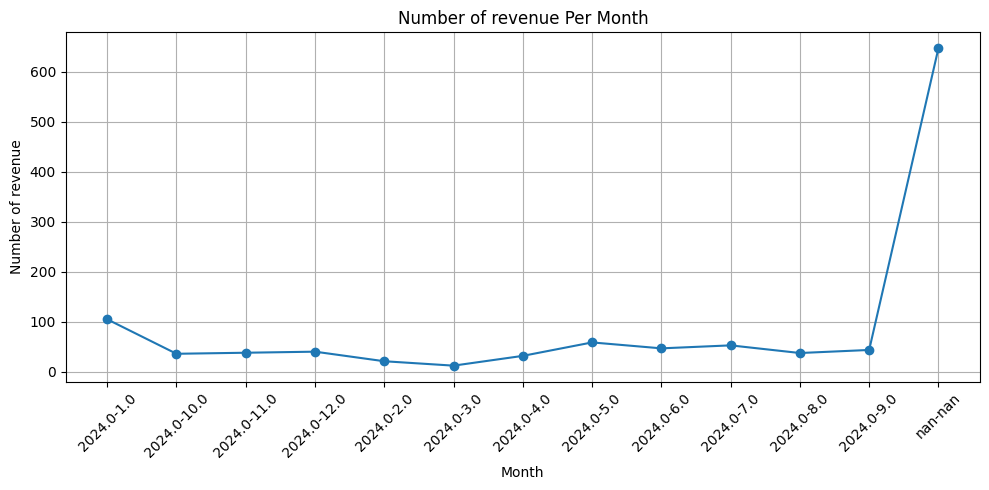

In [425]:
#3	Total revenue and dynamics 
total_revenue = df['Revenue'].sum()
total_revenue_clearned = df_clearned['Revenue'].sum()
print(f'\nTotal summ of revenue: {total_revenue}')
print(f'\nSumm of revenue with recorded date: {total_revenue_clearned}')

print('\nDynamics:')
revenue_per_month = df_clearned.groupby('YearMonth')['Revenue'].sum()
plt.figure(figsize=(10, 5))
plt.plot(revenue_per_month.index, revenue_per_month.values, marker='o')
plt.title('Number of revenue Per Month')
plt.xlabel('Month')
plt.ylabel('Number of revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total summ of cost: 781.504810467251

Summ of cost with recorded date: 781.504810467251

Dynamics:


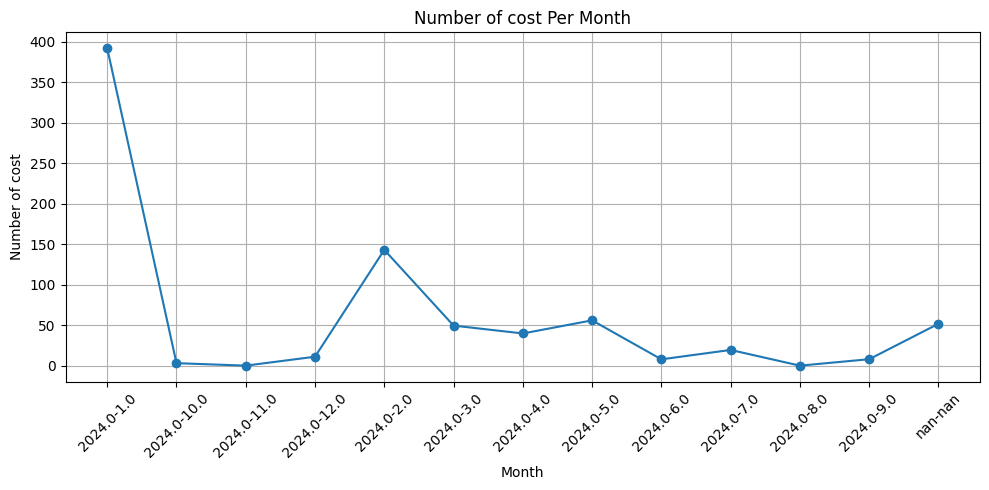

In [426]:
#4	Total costs and dynamics 
df['cost'] = df['Spent'] * df['Sessions']
df_clearned['cost'] = df_clearned['Spent'] * df_clearned['Sessions']
total_cost = df['cost'].sum()
total_cost_clearned = df_clearned['cost'].sum()
print(f'\nTotal summ of cost: {total_cost}')
print(f'\nSumm of cost with recorded date: {total_cost_clearned}')

print('\nDynamics:')
cost_per_month = df_clearned.groupby('YearMonth')['cost'].sum()
plt.figure(figsize=(10, 5))
plt.plot(cost_per_month.index, cost_per_month.values, marker='o')
plt.title('Number of cost Per Month')
plt.xlabel('Month')
plt.ylabel('Number of cost')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total summ of purchases: 1312.624393505454

Summ of purchases with recorded date: 1312.624393505454

Dynamics:


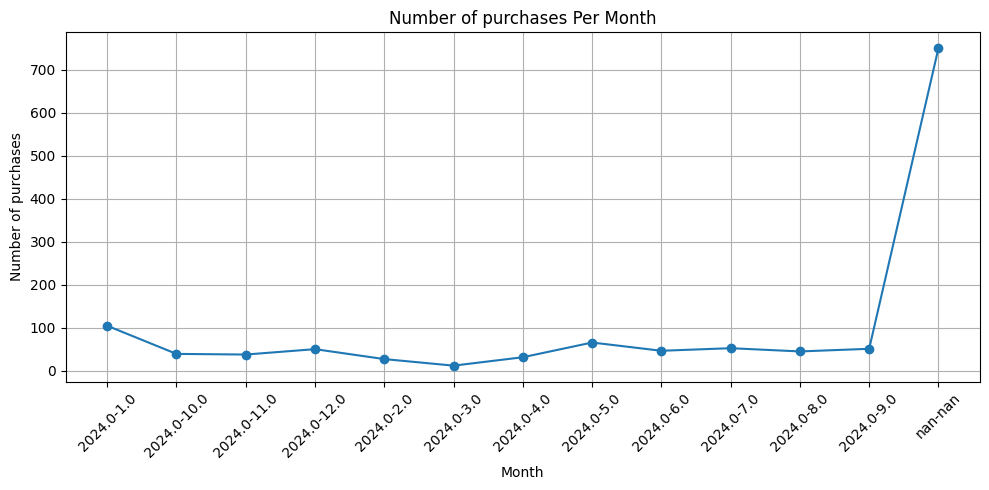

In [427]:
#5	Total purchases and dynamics
df['purchases'] = df['Revenue'] * df['Transactions']
df_clearned['purchases'] = df_clearned['Revenue'] * df_clearned['Transactions']
total_purchases = df['purchases'].sum()
total_purchases_clearned = df_clearned['purchases'].sum()
print(f'\nTotal summ of purchases: {total_purchases}')
print(f'\nSumm of purchases with recorded date: {total_purchases_clearned}')

print('\nDynamics:')
purchases_per_month = df_clearned.groupby('YearMonth')['purchases'].sum()
plt.figure(figsize=(10, 5))
plt.plot(purchases_per_month.index, purchases_per_month.values, marker='o')
plt.title('Number of purchases Per Month')
plt.xlabel('Month')
plt.ylabel('Number of purchases')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total ARPU: 12.14663803360213

ARPU with recorded date: 12.14663803360213

Dynamics:


C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\4204013077.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Revenue'].astype(float).sum() / x['UserID'].nunique())


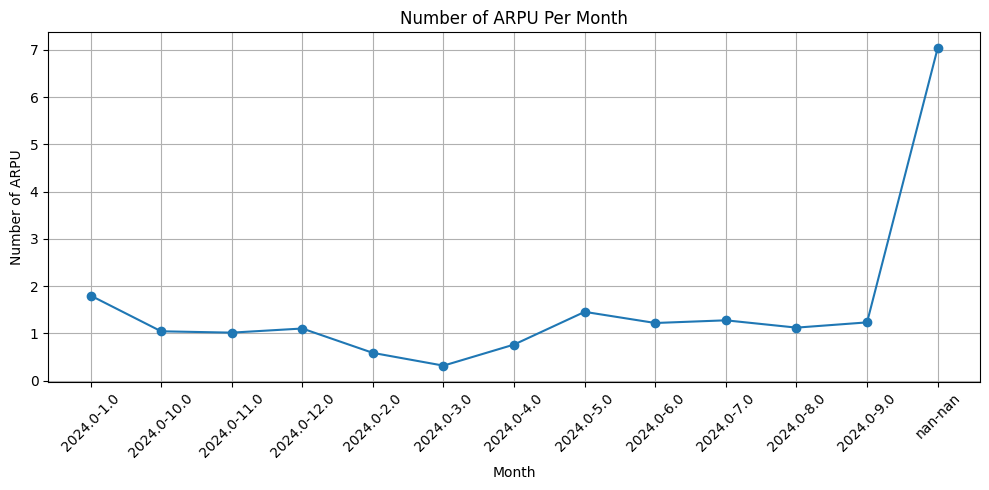

In [428]:
#6	ARPU and dynamics 
total_ARPU = df['Revenue'].astype(float).sum() / df['UserID'].nunique()
total_ARPU_clearned = df_clearned['Revenue'].astype(float).sum() / df_clearned['UserID'].nunique()
print(f'\nTotal ARPU: {total_ARPU}')
print(f'\nARPU with recorded date: {total_ARPU_clearned}')

print('\nDynamics:')
ARPU_per_month = (
    df_clearned
    .groupby('YearMonth')
    .apply(lambda x: x['Revenue'].astype(float).sum() / x['UserID'].nunique())
)
plt.figure(figsize=(10, 5))
plt.plot(ARPU_per_month.index, ARPU_per_month.values, marker='o')
plt.title('Number of ARPU Per Month')
plt.xlabel('Month')
plt.ylabel('Number of ARPU')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total ARPPU: 14.396015447232154

ARPPU with recorded date: 14.396015447232154

Dynamics:


C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\3422227402.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Revenue'].astype(float).sum() \


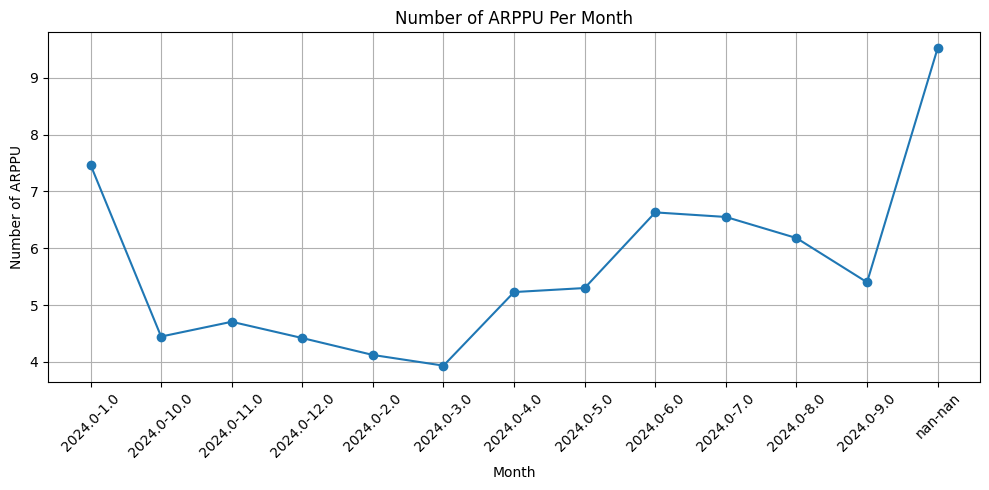

In [429]:
#7	ARPPU and dynamics 
total_ARPPU = df['Revenue'].astype(float).sum() \
    / df.loc[df['Revenue'].astype(float) > 0, 'UserID'].nunique()
total_ARPPU_clearned = df_clearned['Revenue'].astype(float).sum() \
    / df_clearned.loc[df_clearned['Revenue'].astype(float) > 0, 'UserID'].nunique()
print(f'\nTotal ARPPU: {total_ARPPU}')
print(f'\nARPPU with recorded date: {total_ARPPU_clearned}')

print('\nDynamics:')
ARPPU_per_month = (
    df_clearned
    .groupby('YearMonth')
    .apply(lambda x: x['Revenue'].astype(float).sum() \
        / x.loc[x['Revenue'].astype(float) > 0, 'UserID'].nunique()      
    )
)
plt.figure(figsize=(10, 5))
plt.plot(ARPPU_per_month.index, ARPPU_per_month.values, marker='o')
plt.title('Number of ARPPU Per Month')
plt.xlabel('Month')
plt.ylabel('Number of ARPPU')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total ROI: 1311.624393505454

ROI with recorded date: 1311.624393505454

Dynamics:


C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\1959101777.py:16: RuntimeWarning: invalid value encountered in scalar divide
  - x['cost'].astype(float).sum() \
C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\1959101777.py:16: RuntimeWarning: invalid value encountered in scalar divide
  - x['cost'].astype(float).sum() \
C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\1959101777.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['purchases'].astype(float).sum() \


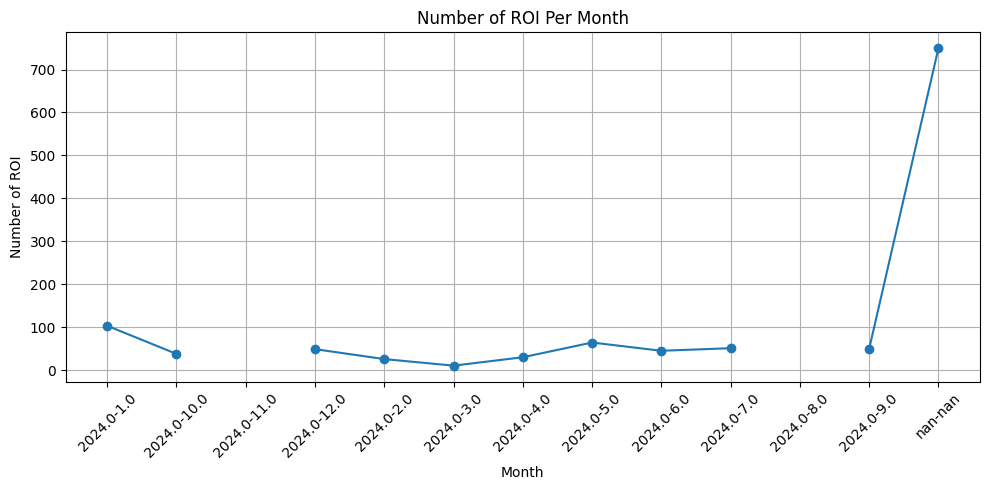

In [430]:
#8	ROI and dynamics 
total_ROI = df['purchases'].astype(float).sum() \
    - df['cost'].astype(float).sum() \
    / df['cost'].astype(float).sum()
total_ROI_clearned = df_clearned['purchases'].astype(float).sum() \
    - df_clearned['cost'].astype(float).sum() \
    / df_clearned['cost'].astype(float).sum()
print(f'\nTotal ROI: {total_ROI}')
print(f'\nROI with recorded date: {total_ROI_clearned}')

print('\nDynamics:')
ROI_per_month = (
    df_clearned
    .groupby('YearMonth')
    .apply(lambda x: x['purchases'].astype(float).sum() \
    - x['cost'].astype(float).sum() \
    / x['cost'].astype(float).sum()      
    )
)
plt.figure(figsize=(10, 5))
plt.plot(ROI_per_month.index, ROI_per_month.values, marker='o')
plt.title('Number of ROI Per Month')
plt.xlabel('Month')
plt.ylabel('Number of ROI')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Total CostOfUserAcquisition: 8.140675109033864

CostOfUserAcquisition with recorded date: 8.140675109033864

Dynamics:


C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\741724577.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['cost'].astype(float).sum() / x['UserID'].nunique()


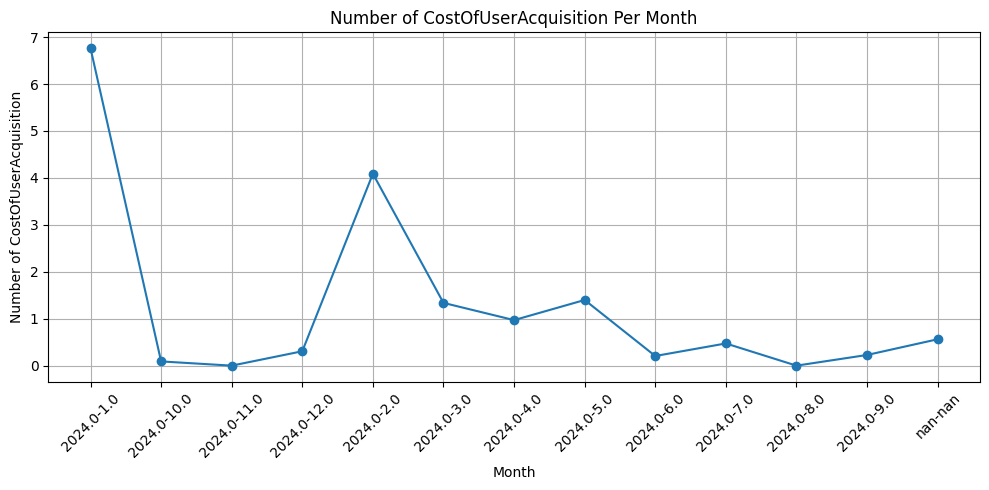

In [431]:
#9	Average cost of user acquisition
total_CostOfUserAcquisition = df['cost'].astype(float).sum() / df['UserID'].nunique()
total_CostOfUserAcquisition_clearned = df_clearned['cost'].astype(float).sum() \
    / df_clearned['UserID'].nunique()
print(f'\nTotal CostOfUserAcquisition: {total_CostOfUserAcquisition}')
print(f'\nCostOfUserAcquisition with recorded date: {total_CostOfUserAcquisition_clearned}')

print('\nDynamics:')
CostOfUserAcquisition_per_month = (
    df_clearned
    .groupby('YearMonth')
    .apply(lambda x: x['cost'].astype(float).sum() / x['UserID'].nunique()    
    )
)
plt.figure(figsize=(10, 5))
plt.plot(CostOfUserAcquisition_per_month.index, CostOfUserAcquisition_per_month.values, marker='o')
plt.title('Number of CostOfUserAcquisition Per Month')
plt.xlabel('Month')
plt.ylabel('Number of CostOfUserAcquisition')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [432]:
#10	Retention dynamics 1/7/28 (from the date of the first session)
#df['YearWeek'] = df['Day'].dt.year.round(0).astype(str) + '-W' + df['Day'].dt.isocalendar().week.astype(str)
#df_clearned['YearWeek'] = df_clearned['Day'].dt.year.round(0).astype(str) + '-W' + df_clearned['Day'].dt.isocalendar().week.astype(str)


df['rank'] = df.groupby('UserID')['Day'].rank(method='min')
df_clearned['rank'] = df_clearned.groupby('UserID')['Day'].rank(method='min')

df_first_purchase = (
    df_clearned 
    .groupby('UserID')['Day'] 
    .min() 
    .reset_index().rename(columns={'Day': 'first_purchase'})
)

df_second_purchase = (
    df_clearned[df_clearned['rank'] == 2]
    .groupby('UserID')['Day']
    .first()
    .reset_index()
    .rename(columns={'Day': 'second_purchase'})
)

df_retention = df_first_purchase.merge(df_second_purchase,on='UserID',how = 'left')

del df_first_purchase,df_second_purchase


In [433]:
df_retention.head(5)

,UserID,first_purchase,second_purchase
0,11966,2024-01-03,2024-01-04
1,14199,2024-01-04,2024-02-03
2,14492,2024-05-03,NaT
3,14645,2024-05-03,2024-06-03
4,14891,NaT,NaT


In [434]:
df_retention['days_to_return'] = (
    (df_retention['second_purchase'] - df_retention['first_purchase']).dt.days
).astype('Int64')

In [435]:
df_retention.head(4)

,UserID,first_purchase,second_purchase,days_to_return
0,11966,2024-01-03,2024-01-04,1
1,14199,2024-01-04,2024-02-03,30
2,14492,2024-05-03,NaT,<NA>
3,14645,2024-05-03,2024-06-03,31


In [436]:
df_retention_clean = df_retention.dropna(subset=['days_to_return']).copy()
del df_retention

In [437]:
conditions_of_return = [
    df_retention_clean['days_to_return'] == 1,
    df_retention_clean['days_to_return'] <= 7,
    df_retention_clean['days_to_return'] <= 28,
    df_retention_clean['days_to_return'] > 28
]
retention_categorys = ['1 day','7 days','28 days','more']
df_retention_clean['retention_category'] = np.select(conditions_of_return,retention_categorys,default='no_return')

In [438]:
import seaborn as sns

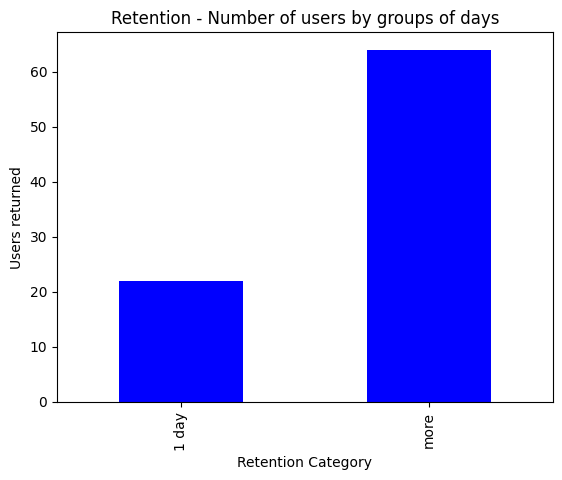

In [439]:
ret_count = df_retention_clean.groupby('retention_category')['UserID'].count()
ret_count.plot(kind='bar',color='blue')
plt.title('Retention - Number of users by groups of days')
plt.xlabel('Retention Category')
plt.ylabel('Users returned')
plt.show()

In [440]:
df_retention_clean[ \
    (df_retention_clean['days_to_return'] <= 20) & \
    (df_retention_clean['days_to_return'] > 1) \
].head(5)

,UserID,first_purchase,second_purchase,days_to_return,retention_category


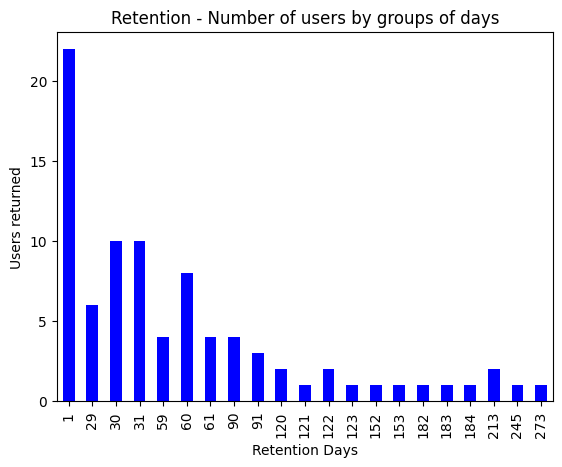

In [441]:
#11	Rolling Retention cohort by days 1-30
ret_count = df_retention_clean.groupby('days_to_return')['UserID'].count()
ret_count.plot(kind='bar',color='blue')
plt.title('Retention - Number of users by groups of days')
plt.xlabel('Retention Days')
plt.ylabel('Users returned')
plt.show()

In [442]:
max_day = df_retention_clean['days_to_return'].max()
groupd_days_by_30 = []

for i in range(1, (max_day // 30) + 1):
    groupd_days_by_30.append((i * 30,i))

conditions_of_return_30days = []
for b1,b2 in groupd_days_by_30:
    if i == 0:
        conditions_of_return_30days.append(df_retention_clean['days_to_return'] == b1)
        i=i+1
    else:
        conditions_of_return_30days.append(df_retention_clean['days_to_return'] <= b1)
        i=i+1

labels_30days = [f"{i1} days" for i1, i2 in groupd_days_by_30]
labels_30days_sort = [i2 for i1, i2 in groupd_days_by_30]

In [443]:
df_retention_clean['retention_category_30days'] = np.select(
    conditions_of_return_30days,
    [str(x) for x in labels_30days],
    default='no_return'
)
df_retention_clean['retention_category_30days_sort'] = np.select(
    conditions_of_return_30days,
    [str(x) for x in labels_30days_sort],
    default='999'
)
ret_count_30days = (
    df_retention_clean.groupby(['retention_category_30days', 'retention_category_30days_sort'])['UserID']
    .count()
    .reset_index()
    .sort_values(['retention_category_30days_sort', 'retention_category_30days'])
)

In [444]:
print(ret_count_30days)

  retention_category_30days retention_category_30days_sort  UserID
6                   30 days                              1      38
7                   60 days                              2      22
8                   90 days                              3       8
0                  120 days                              4       5
1                  150 days                              5       4
2                  180 days                              6       2
3                  210 days                              7       3
4                  240 days                              8       2
5                  270 days                              9       1
9                 no_return                            999       1


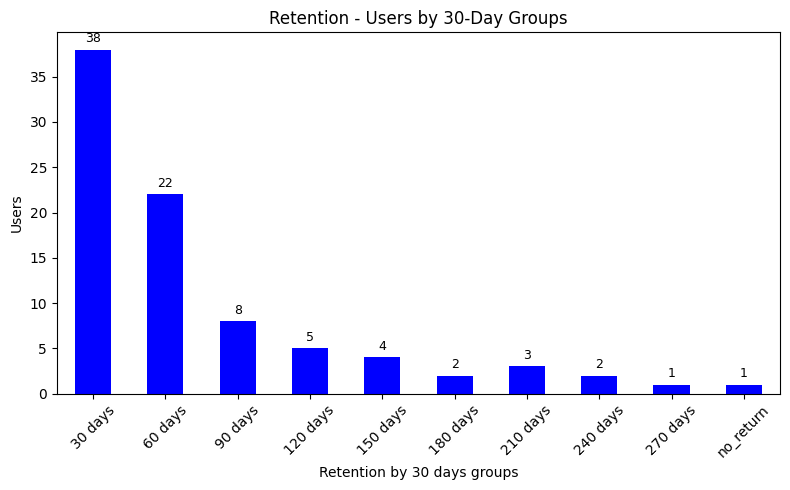

In [445]:
ax = ret_count_30days.plot(
    kind='bar',
    x='retention_category_30days',
    y='UserID',
    color='blue',
    legend=False,
    figsize=(8,5)
)

plt.title('Retention - Users by 30-Day Groups')
plt.xlabel('Retention by 30 days groups')
plt.ylabel('Users')
plt.xticks(rotation=45)

# ✅ Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

In [446]:
# 2. How would you design the Power BI architecture?
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')

In [ ]:
#--DimUsers
df_DimUsers = df.groupby('UserID', as_index=False).agg(
    min_date = ('Day',min),
    max_date = ('Day',max)
)
df_DimUsers['Retention_days'] = (df_DimUsers['max_date'] - df_DimUsers['min_date']).dt.days
df_DimUsers['Retention_30days'] = ((df_DimUsers['max_date'] - df_DimUsers['min_date']).dt.days / 30).fillna(0).round(6)
df_DimUsers[['UserID','Retention_days']] = df_DimUsers[['UserID','Retention_days']].astype('Int64')
df_DimUsers['Retention_30days'] = df_DimUsers['Retention_30days'].astype(float)
df_DimUsers.to_csv(csv_path + "DimUsers.csv",index=False,float_format='%.6f')

C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\3009905466.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_DimUsers = df.groupby('UserID', as_index=False).agg(
C:\Users\sssns\AppData\Local\Temp\ipykernel_18384\3009905466.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_DimUsers = df.groupby('UserID', as_index=False).agg(


In [ ]:
#DimDate
start_date = df['Day'].min()
end_date = df['Day'].max()

# Create the date dimension table
df_DimDate = pd.DataFrame({
    'Date': pd.date_range(start=start_date, end=end_date, freq='D')
})

df_DimDate['Year'] = df_DimDate['Date'].dt.year
df_DimDate['Quarter'] = df_DimDate['Date'].dt.to_period('Q').astype(str)
df_DimDate['Month'] = df_DimDate['Date'].dt.month
df_DimDate['Month_Name'] = df_DimDate['Date'].dt.month_name()
df_DimDate['Week'] = df_DimDate['Date'].dt.isocalendar().week
df_DimDate['Day'] = df_DimDate['Date'].dt.day
df_DimDate['Day_of_Week'] = df_DimDate['Date'].dt.weekday + 1  
df_DimDate['Year_Month'] = df_DimDate['Date'].dt.to_period('M').astype(str)
df_DimDate['Year_Week'] = df_DimDate['Date'].dt.strftime('%G-%V')  
df_DimDate['Date_ID'] = df_DimDate['Year'] * 10000 + df_DimDate['Month'] * 100 + df_DimDate['Day']

df_DimDate.to_csv(csv_path+"DimDate.csv")
df_clearned.

In [449]:
#DimOS
df_DimOS = df[['OS']].drop_duplicates().reset_index(drop=True)
df_DimOS['OS_ID'] = range(1, len(df_DimOS) + 1)
df_DimOS.to_csv(csv_path+"DimOS.csv")

In [450]:
#DimCountry
df_DimCountry = df[['Country']].drop_duplicates().reset_index(drop=True)
df_DimCountry['Country_ID'] = range(1, len(df_DimCountry) + 1)
df_DimCountry.to_csv(csv_path+"DimCountry.csv")

In [451]:
#--FactSessions
df.rename(columns = {"Day":"Date"}, inplace='True')
df = df.merge(df_DimCountry[['Country','Country_ID']],how='left',on='Country',suffixes=('','__temp'))
df = df.merge(df_DimOS[['OS','OS_ID']],"left","OS",suffixes=('','__temp'))
df = df.merge(df_DimDate[['Date','Date_ID']],'left','Date',suffixes=('','__temp'))
df.drop(columns=['Country','OS','Date','Month','Year','Weekday','YearMonth'],inplace = True)
df[['Date_ID','OS_ID','Country_ID','rank']] = df[['Date_ID','OS_ID','Country_ID','rank']].astype('Int64')
df[['Revenue','cost','Spent','purchases']] = df[['Revenue','cost','Spent','purchases']].astype(float)
df = df.fillna(0)  
df.to_csv(csv_path + "FactSessions.csv", index=False, float_format='%.6f')

In [452]:

df.head()


,UserID,Sessions,Duration,Transactions,Spent,Revenue,cost,purchases,rank,Country_ID,OS_ID,Date_ID
0,99610,2,83,1,1.386057,6.928618,2.772115,6.928618,1,1,1,20240503
1,99610,3,97,1,0.000000,9.576498,0.000000,9.576498,2,1,1,20240703
2,99610,1,50,0,0.000000,0.000000,0.000000,0.000000,3,1,1,20240903
3,99610,4,153,0,0.000000,0.000000,0.000000,0.000000,4,1,1,20241103
4,99610,2,54,0,0.000000,0.000000,0.000000,0.000000,0,1,1,0
